### Objective: Which products will an Instacart consumer purchase again?
#### We'll apply some different models to observe their predictive performance. 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('precision',4)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
# read in feature datasets
prior_orders_df = pd.read_csv('transformed/prior_order_features.csv')
train_orders_df = pd.read_csv('transformed/train_order_features.csv')

In [8]:
# evaluate performance using LR

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# assign features and targets from training data
X_prior = prior_orders_df[['user_prod_reorder_rate','user_prod_reorders','prod_reorder_rate','prod_reorders']]
y_prior = prior_orders_df['reordered']

# initialize validation data
X_train = train_orders_df[['user_prod_reorder_rate','user_prod_reorders','prod_reorder_rate','prod_reorders']]
y_train = train_orders_df['reordered']

lr = LogisticRegression()
lr.fit(X_prior,y_prior)

# Calculate precision and recall scores
accuracy = lr.score(X_train,y_train)
precision = float(precision_score(y_train, lr.predict(X_train)))
recall = float(recall_score(y_train, lr.predict(X_train)))

print("The accuracy score is {:.1f}%.".format(accuracy*100))

print("The precision is {:.1f}% and the recall is {:.1f}%.".format(precision * 100, recall * 100))

The accuracy score is 98.4%.
The precision is 97.4% and the recall is 100.0%.


In [6]:
# determine null accuracy
y_train.value_counts(normalize=True)

1    0.5958
0    0.4042
Name: reordered, dtype: float64

_It appears the LR model has very high precision and perfect recall, far exceeding the null accuracy baseline._

Text(0.5,0,u'False Positive Rate')

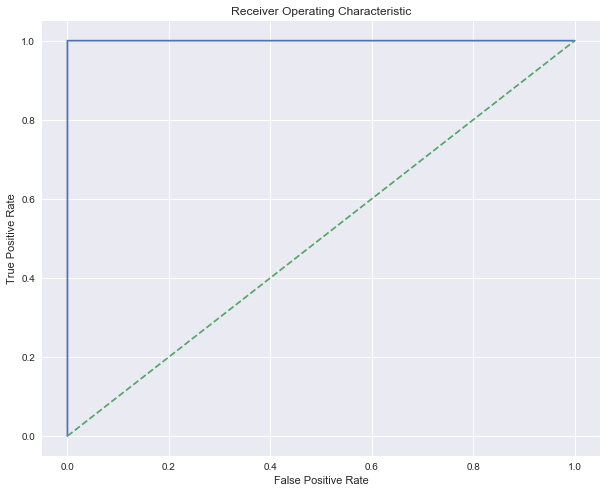

In [10]:
# Visualize precision and recall using ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

y_prob = lr.predict_proba(X_train)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, y_prob)

plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [11]:
# Calculate the area under the curve using AUROC score
# The estimated probability that a uniformly drawn random positive is ranked before a uniformly drawn random negative.
ras = roc_auc_score(y_train, y_prob)
print("The AUROC score is {:.1f}%.".format(ras*100))

The AUROC score is 100.0%.


In [14]:
# Let's take a look at how some other models perform

from sklearn import ensemble, neighbors
from sklearn.model_selection import cross_val_score

cls = ensemble.RandomForestClassifier(n_estimators=50) 
cls.fit(X_prior, y_prior)

print ('Random Forest: {:.1f}%.'.format( cross_val_score(cls, X_train, y_train, scoring='roc_auc', cv=5).mean() * 100 ))
    
cls = ensemble.GradientBoostingClassifier(n_estimators=50) 
cls.fit(X_prior, y_prior)

print ('GBDT: {:.1f}%.'.format( cross_val_score(cls, X_train, y_train, scoring='roc_auc', cv=5).mean() * 100 ))
    
cls = neighbors.KNeighborsClassifier(n_neighbors=5)
cls.fit(X_prior, y_prior)

print ('KNN: {:.1f}%.'.format( cross_val_score(cls, X_train, y_train, scoring='roc_auc', cv=5).mean() * 100 ))

Random Forest: 100.0%.
GBDT: 100.0%.
KNN: 100.0%.
